##Entrega Taller 03 Analitica de Negocios.

[Enlace del GitHub](https://github.com/ssanchezal22/Taller-03-ANLTC)

In [22]:
#Se importa bd del GitHub
import pandas as pd
bd = pd.read_csv('https://raw.githubusercontent.com/ousuga/Proyecto1_IAN/main/precios_pdtos_agricolas.cvs')
bd.head(10)

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
5,Arveja verde en vaina,cúcuta,9417,0.11,01ago2023,NaN,NaN
6,Arveja verde en vaina,ibagué,6000,-0.01,01ago2023,4.451921,-75.252591
7,Arveja verde en vaina,medellín,5950,n.d.,01ago2023,6.257590,-75.611031
8,Arveja verde en vaina,neiva,5653,-0.12,01ago2023,2.993360,-75.272362
9,Arveja verde en vaina,pereira,7200,n.d.,01ago2023,4.803663,-75.795791


In [23]:
#ver datos duplicados
dupli = bd.duplicated(keep = 'last')
bd[dupli]

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
896,Chócolo mazorca,pereira,n.d.,n.d.,03ago2023,4.803663,-75.795791
1016,Zanahoria,pereira,n.d.,n.d.,03ago2023,4.803663,-75.795791
1331,Plátano guineo,pereira,n.d.,n.d.,03ago2023,4.803663,-75.795791
2856,Chócolo mazorca,pereira,n.d.,n.d.,10ago2023,4.803663,-75.795791
2976,Zanahoria,pereira,n.d.,n.d.,10ago2023,4.803663,-75.795791
3021,Coco,pereira,n.d.,n.d.,10ago2023,4.803663,-75.795791
3291,Plátano guineo,pereira,n.d.,n.d.,10ago2023,4.803663,-75.795791
5306,Chócolo mazorca,pereira,n.d.,n.d.,17ago2023,4.803663,-75.795791
5426,Zanahoria,pereira,n.d.,n.d.,17ago2023,4.803663,-75.795791
5741,Plátano guineo,pereira,n.d.,n.d.,17ago2023,4.803663,-75.795791


In [24]:
#ahora, se eliminan los datos duplicados
bd = bd.drop_duplicates()
#se muestran los valores no faltantes y el tipo de dato
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9227 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      9227 non-null   object 
 1   ciudad        9227 non-null   object 
 2   precio        9227 non-null   object 
 3   variabilidad  9227 non-null   object 
 4   fecha         9227 non-null   object 
 5   LATITUD       7092 non-null   float64
 6   LONGITUD      7092 non-null   float64
dtypes: float64(2), object(5)
memory usage: 576.7+ KB


##Para precio y variabilidad se tiene que cambiar el tipo de dato a float y se tiene que reemplazar todos  elementos nulos que aparecen como 'n.d.' por None

In [25]:
#se cambia 'n.d. por None'
bd = bd.replace(to_replace='n.d.', value=None)

#se cambia el tipo de dato a precio y variabilidad
bd['precio'] = bd['precio'].astype(float)
bd['variabilidad'] = bd['variabilidad'].astype(float)

In [26]:
#se imprimen los valores faltantes de cada uno
print(bd.isnull().sum())

producto           0
ciudad             0
precio          2223
variabilidad    2371
fecha              0
LATITUD         2135
LONGITUD        2135
dtype: int64


##- Se decide eliminar los datos faltantes para precio dado que esto puede suponer que no haya el producto en dicha ciudad.
##- Para los datos faltantes variabilidad se decide reemplazarlos por la mediana de cada producto para que no vata a ver afectaciones en la centralidad y distribución de estos datos.
##- Para los datos faltantes de Latitud y Longitud, dado que son datos unicos de las centrales de abastos del país se buscará las ciudades que si tengan dichos datos.

In [27]:
bd = bd.loc[bd['precio'].notnull()]
print(bd.isnull().sum())

producto           0
ciudad             0
precio             0
variabilidad     148
fecha              0
LATITUD         1385
LONGITUD        1385
dtype: int64


In [28]:
#Productos
productos = bd['producto'].unique()
list_var = []

#Se añade a una lista el producto con su respectiva variabilidad
for i in productos:
  aux = bd[bd['producto'] == i]
  mediana_var = bd['variabilidad'].median()
  list_var.append((i,mediana_var))
list_var

[('Arveja verde en vaina', 0.0),
 ('Cebolla cabezona blanca', 0.0),
 ('Cebolla junca', 0.0),
 ('Chócolo mazorca', 0.0),
 ('Fríjol verde*', 0.0),
 ('Habichuela', 0.0),
 ('Lechuga batavia', 0.0),
 ('Pepino cohombro', 0.0),
 ('Pimentón', 0.0),
 ('Remolacha', 0.0),
 ('Tomate*', 0.0),
 ('Zanahoria', 0.0),
 ('Aguacate*', 0.0),
 ('Banano*', 0.0),
 ('Coco', 0.0),
 ('Granadilla', 0.0),
 ('Guayaba*', 0.0),
 ('Limón común', 0.0),
 ('Limón Tahití', 0.0),
 ('Lulo', 0.0),
 ('Mandarina*', 0.0),
 ('Mango tommy', 0.0),
 ('Manzana royal gala', 0.0),
 ('Maracuyá', 0.0),
 ('Mora de Castilla', 0.0),
 ('Naranja*', 0.0),
 ('Papaya maradol', 0.0),
 ('Piña *', 0.0),
 ('Tomate de árbol', 0.0),
 ('Arracacha*', 0.0),
 ('Papa negra*', 0.0),
 ('Papa criolla', 0.0),
 ('Plátano guineo', 0.0),
 ('Plátano hartón verde', 0.0),
 ('Yuca*', 0.0),
 ('Aguacate *', 0.0),
 ('Papa  criolla', 0.0)]

In [29]:
import numpy as np
nulos = bd['variabilidad'].isnull()
bd[nulos]
indices = bd['variabilidad'].index
for i in indices:
  if np.isnan(bd['variabilidad'][i]):
    for j in range(len(list_var)):
      if bd['producto'][i] == list_var[j][0]:
        bd['variabilidad'][i] = list_var[j][1]
      else:
        pass
  else:
    pass

<ipython-input-29-ff56ac461a71>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bd['variabilidad'][i] = list_var[j][1]


In [30]:
bd.isnull().sum()

producto           0
ciudad             0
precio             0
variabilidad       0
fecha              0
LATITUD         1385
LONGITUD        1385
dtype: int64

##Ya no se registran datos faltantes de variabilidad ya que fueron reemplazados por la mediana.

In [32]:
#ciudades
ciud = bd['ciudad'].unique()
lista1 = []
lista2 = []
for i in ciud:
  #se filtra para cada una
  h = bd[bd['ciudad'] == i]
  #booleano de elementos no nulos
  no_nulos = h[['ciudad', 'LATITUD', 'LONGITUD']].notnull()
  #marco de datos de elementos no nulos
  h = h[no_nulos]
  #fila con elementos no nulos de ciudad, latitud y longitud
  h = h.iloc[0]
  #guardar elementos en una lista con la ciudad, latitud y longitud
  lista2.append(h['ciudad'])
  lista2.append(h['LATITUD'])
  lista2.append(h['LONGITUD'])
  #se agg la lista con los elementos a una lista
  lista1.append(lista2)
  lista2 = []
print(lista1)

[['armenia', 6.163683758, -75.80995528], ['bogotá', nan, nan], ['bucaramanga', 7.155833544, -73.11156997], ['cali', 3.399043723, -76.57649259], ['cúcuta', nan, nan], ['ibagué', 4.451921427, -75.252591], ['medellín', 6.257590259, -75.61103107], ['neiva', 2.993360046, -75.27236232], ['pereira', 4.803662773, -75.79579093], ['tunja', 5.518472615, -73.37801856], ['santa', nan, nan], ['barranquilla', 10.98152051, -74.82771544], ['pasto', 1.083605497, -77.20610074], ['popayán', 2.471704362, -76.59194419], ['villavicencio', 4.09166877, -73.49291595], ['cartagena', nan, nan], ['montería', 8.584698016, -75.95055079], ['sincelejo', 9.316673928, -75.43174967], ['valledupar', 10.21890277, -73.45784764], ['manizales', 5.08343301, -75.50727881]]


##diferentes ciudades como lo son bogotá, cucuta, entre otras no tienen niguna entrada en Latitud y Longitud, por lo que la estrategia no se va a utilizar. Se van dejar estas entradas de latitud y longitud vacías y solo realizar el resto del analisis con las otras variables.

In [33]:
#verificación de datos vacíos en latitud y longitud
bd[bd['ciudad'] == 'bogotá']

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
2,Arveja verde en vaina,bogotá,7925.0,0.11,01ago2023,NaN,NaN
14,Cebolla cabezona blanca,bogotá,1763.0,0.01,01ago2023,NaN,NaN
26,Cebolla junca,bogotá,3924.0,0.19,01ago2023,NaN,NaN
38,Chócolo mazorca,bogotá,1642.0,0.15,01ago2023,NaN,NaN
50,Fríjol verde*,bogotá,3825.0,-0.09,01ago2023,NaN,NaN
...,...,...,...,...,...,...,...
9158,Tomate de árbol,bogotá,2850.0,0.06,29ago2023,NaN,NaN
9170,Arracacha*,bogotá,3208.0,-0.03,29ago2023,NaN,NaN
9182,Papa negra*,bogotá,1538.0,0.00,29ago2023,NaN,NaN
9194,Papa criolla,bogotá,3944.0,0.01,29ago2023,NaN,NaN


In [13]:
bd[bd['ciudad'] == 'bogotá'].isnull().sum()

producto          0
ciudad            0
precio            0
variabilidad      0
fecha             0
LATITUD         587
LONGITUD        587
dtype: int64

## La cantidad de datos que faltan en latitud y longitud para Bogotá coinciden con la cantidad de registros para esta ciudad.

# Identificación de Outliers
#####Se decide estandarizar las variables de precio y variabilidad con el fin de tener una misma escala de comparación ya que el precio tendrá valores más elevados que la variabilidad.

In [34]:
#estandarización usando stats.zscore
import pandas as pd
import scipy
from scipy import stats

#se copian los datos originales en otro marco de datos
bd2 = bd.copy()

bd2['precio'] = stats.zscore(bd2['precio'])
bd2['variabilidad'] = stats.zscore(bd2['variabilidad'])
bd2.head()
bd2_e = bd2.loc[:,['precio','variabilidad']]
bd2_e
zscore_pre = bd2_e['precio']
zscore_var = bd2_e['variabilidad']

In [35]:
#punto outliers entre -3.5 y 3.5
#se seleccionan los outliers usando un límite de 3.5
zscore_pre_abs = np.abs(zscore_pre)
out_zscore_pre = bd2_e[zscore_pre_abs > 3.5]

zscore_var_abs = np.abs(zscore_var)
out_zscore_var = bd2_e[zscore_var_abs > 3.5]

In [36]:
len(out_zscore_pre)

14

In [37]:
len(out_zscore_var)

86

####Se deciden imputar los datos usando la mediana para no afectar la centralidad de los datos. No es un gran volumen de datos outliers respeto a la cantidad total de datos.

In [38]:
#mediana variables
mediana_pre = bd['precio'].median()
mediana_var = bd['variabilidad'].median()

pre_imputado = bd.copy()
pre_imputado.loc[out_zscore_pre.index, 'precio'] = mediana_pre

var_imputado = bd.copy()
var_imputado.loc[out_zscore_var.index, 'variabilidad'] = mediana_var

###Graficar

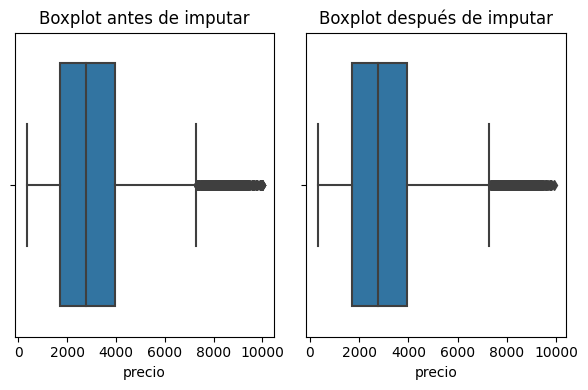

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

#marco grafico de 1x2
fig, axes = plt.subplots(1, 2, figsize = (6, 4))

#boxplot antes y después de imputar
sns.boxplot(data = bd, x = 'precio', ax = axes[0])
sns.boxplot(data = pre_imputado, x = 'precio', ax = axes[1])

#nombres
axes[0].set_title('Boxplot antes de imputar')
axes[1].set_title('Boxplot después de imputar')

plt.tight_layout()


### no se nota mucho la diferencia en a la imputación, dado que solo son 14 datos

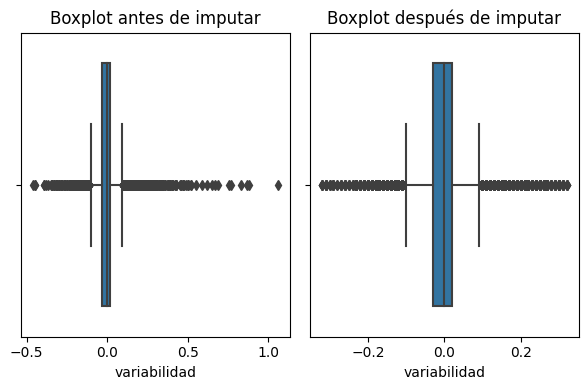

In [41]:
#Graficar
# Importar librerias seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un marco grafico 1x2
fig, axes = plt.subplots(1, 2, figsize = (6, 4))

# Crear una boxplot antes y después de imputar
sns.boxplot(data = bd, x = 'variabilidad', ax = axes[0])
sns.boxplot(data = var_imputado, x = 'variabilidad', ax = axes[1])

# Adicionar nombres
axes[0].set_title('Boxplot antes de imputar')
axes[1].set_title('Boxplot después de imputar')

plt.tight_layout()

##la imputación es más notoria dado que era un número de datos outliers mayor equivalente a 84. Sin embargo, sigue siendo una cantidad baja respecto al total de datos

In [42]:
#librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Preguntas:

1. ¿Qué ciudad tiene mayor variabilidad en el precio del coco?

2. ¿Cuál es la ciudad con los precios promedio mas bajos?

3. ¿Cuál es el producto más barato?

4. ¿En qué ciudad la zanahoria tiene un precio más favorable?

5. ¿Cuál es el producto más barato en Medellín?

In [ ]:
#Pregunta1
df_coco = bd[bd['producto'] == 'Coco']
ciudades = df_coco['ciudad'].unique()
var = []
for i in ciudades:
  aux = df_coco[df_coco['ciudad'] == i]
  prom = aux['variabilidad'].mean()
  var.append(prom)

var = np.abs(var)
df = {'ciudad': ciudades, 'var prom': var}
df = pd.DataFrame(df)
df[df['var prom'] == df['var prom'].max()]

In [ ]:
y_pos = np.arange(len(ciudades))
#crea las barras
plt.barh(y_pos, var)
#crea y añade el nombre del eje
plt.yticks(y_pos, ciudades)
plt.show()

In [ ]:
#Pregunta2
ciudades = bd['ciudad'].unique()
pre_prom = []

for i in ciudades:
#filtra base de datos por ciudad
  aux = bd[bd['ciudad'] == i]
#Calcula precio promedio
  preci = aux['precio'].mean()
  pre_prom.append(preci)

df = {'ciudad':ciudades, 'precio_prom':pre_prom}
df = pd.DataFrame(df)
df[df['precio_prom'] == df['precio_prom'].min()]

In [ ]:
y_pos = np.arange(len(ciudades))
#crea las barras
plt.barh(y_pos, pre_prom)
#crea y añade el nombre del eje
plt.yticks(y_pos, ciudades)
plt.show()

In [ ]:
#Pregunta3
aux = bd[bd['ciudad'] == 'bogotá']
prom = aux['producto'].unique()
precios = []

for i in prom:
  aux2 = aux[aux['producto'] == i]['precio'].mean()
  precios.append(aux2)

df = {'producto': prom, 'precio_prom': precios}
df = pd.DataFrame(df)
df[df['precio_prom'] == df['precio_prom'].min()]

In [ ]:
y_pos = np.arange(len(prom))
#crea las barras
plt.barh(y_pos, precios)
#crea y añade el nombre del eje
plt.yticks(y_pos, prom)
plt.show()

In [ ]:
#pregunta4
df_zana = bd[bd['producto'] == 'Zanahoria']
ciudades = df_zana['ciudad'].unique()
precio = []
for i in ciudades:
  aux = df_zana[df_zana['ciudad'] == i]
  prom = aux['precio'].mean()
  precio.append(prom)

df = {'ciudad': ciudades, 'precio prom': precio}
df = pd.DataFrame(df)
df[df['precio prom'] == df['precio prom'].min()]

In [ ]:
y_pos = np.arange(len(ciudades))
#crea las barras
plt.barh(y_pos, precio)
#crea y añade el nombre del eje
plt.yticks(y_pos, ciudades)
plt.show()

In [ ]:
#Pregunta5
aux = bd[bd['ciudad'] == 'sincelejo']
pro_sin = aux['producto'].unique()
precios = []

for i in pro_sin:
  aux2 = aux[aux['producto'] == i]['precio'].mean()
  precios.append(aux2)

df = {'producto': pro_sin, 'precio_prom': precios}
df = pd.DataFrame(df)
df[df['precio_prom'] == df['precio_prom'].min()]

In [ ]:
y_pos = np.arange(len(pro_sin))
#crea las barras
plt.barh(y_pos, precios)
#crea y añade el nombre del eje
plt.yticks(y_pos, pro_med)
plt.show()